In [92]:
# install matplotlib_venn
import sys
!{sys.executable} -m pip install matplotlib_venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=d209855fae1f2d765de172b43af9bdc11ed4701f3fbf5f3e15473526dee7204d
  Stored in directory: /Users/chiraag/Library/Caches/pip/wheels/32/41/5f/d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built matplotlib-venn


In [93]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hirar_utils
from sklearn.cluster import AgglomerativeClustering
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles


sb.set_theme()

# import data frames
%store -r final_data
# simplified dataframe with Principal components
%store -r data6D

# Hierarchical model
We will compare four different linkage methods on euclidean distance

In [94]:
data6DCP = data6D.copy()
countries = data6DCP["Country"]
data6DCP = data6DCP.drop(columns=["Country"])
plt.figure(figsize=(16,16))

# different types of linkages:
# ward - minizes variance
# average - uses the average of the distances of each observation of the two sets
# complete - uses the maximum distances between all observations of the two sets
# single - uses the minimum of the distances between all observations of the two sets

WARD = 'ward'
AVG = 'average'
COMPLETE = 'complete'
SINGLE = 'single'
DISTANCE = 'euclidean'

<Figure size 1152x1152 with 0 Axes>

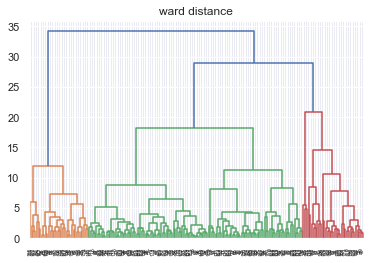

In [95]:
# ward
plt.plot(figsize=(16,24))
plt.title(WARD + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=WARD, metric=DISTANCE))

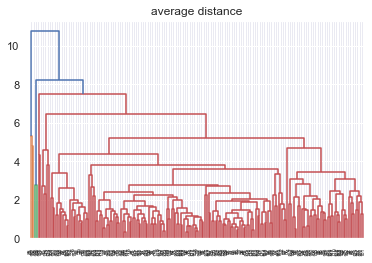

In [96]:
# average
plt.plot(figsize=(16,24))
plt.title(AVG + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=AVG, metric=DISTANCE))

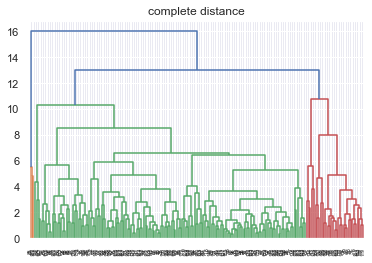

In [97]:
# complete
plt.plot(figsize=(16,24))
plt.title(COMPLETE + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=COMPLETE, metric=DISTANCE))

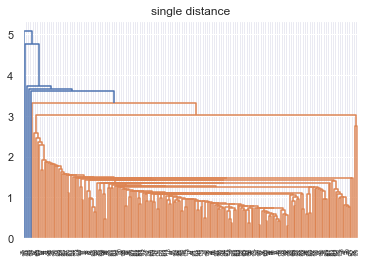

In [98]:
# single
plt.plot(figsize=(50,50))
plt.title(SINGLE + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=SINGLE, metric=DISTANCE))

### Choosing a linkage
From the dendograms, ward and complete give us the most clear cluster information  
so we will explore these 2 linkages in more detail

<AxesSubplot:xlabel='complete_model_4_clusters', ylabel='count'>

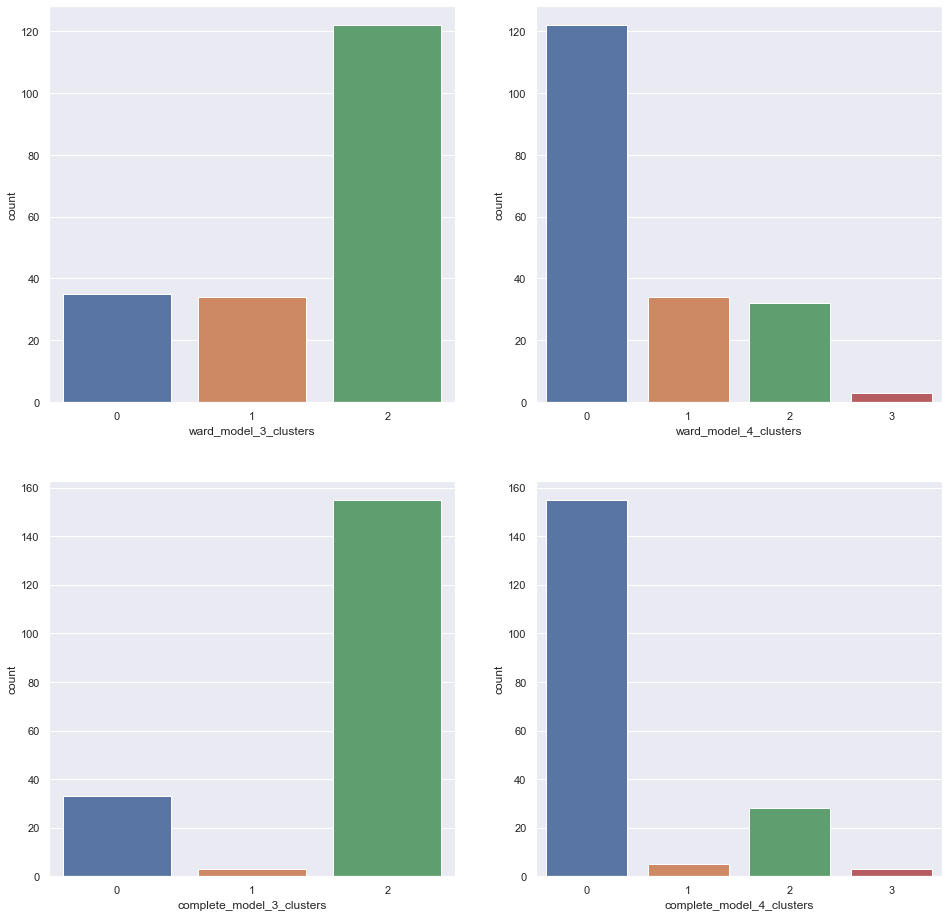

In [99]:
# do clustering
ward_model_3_clusters = AgglomerativeClustering(n_clusters=3, affinity=DISTANCE, linkage=WARD).fit_predict(data6DCP)
ward_model_4_clusters = AgglomerativeClustering(n_clusters=4, affinity=DISTANCE, linkage=WARD).fit_predict(data6DCP)
complete_model_3_clusters = AgglomerativeClustering(n_clusters=3, affinity=DISTANCE, linkage=COMPLETE).fit_predict(data6DCP)
complete_model_4_clusters = AgglomerativeClustering(n_clusters=4, affinity=DISTANCE, linkage=COMPLETE).fit_predict(data6DCP)

# add cluster labels back to data
clustered_data = data6DCP.copy()
clustered_data["ward_model_3_clusters"] = pd.Categorical(ward_model_3_clusters)
clustered_data["ward_model_4_clusters"] = pd.Categorical(ward_model_4_clusters)
clustered_data["complete_model_3_clusters"] = pd.Categorical(complete_model_3_clusters)
clustered_data["complete_model_4_clusters"] = pd.Categorical(complete_model_4_clusters)


f, axes = plt.subplots(2,2, figsize=(16,16))
sb.countplot(x = "ward_model_3_clusters", data = clustered_data, ax=axes[0][0])
sb.countplot(x = "ward_model_4_clusters", data = clustered_data, ax=axes[0][1])
sb.countplot(x = "complete_model_3_clusters", data = clustered_data, ax=axes[1][0])
sb.countplot(x = "complete_model_4_clusters", data = clustered_data, ax=axes[1][1])

<AxesSubplot:xlabel='gdp-health-demographics-inv', ylabel='complete_model_4_clusters'>

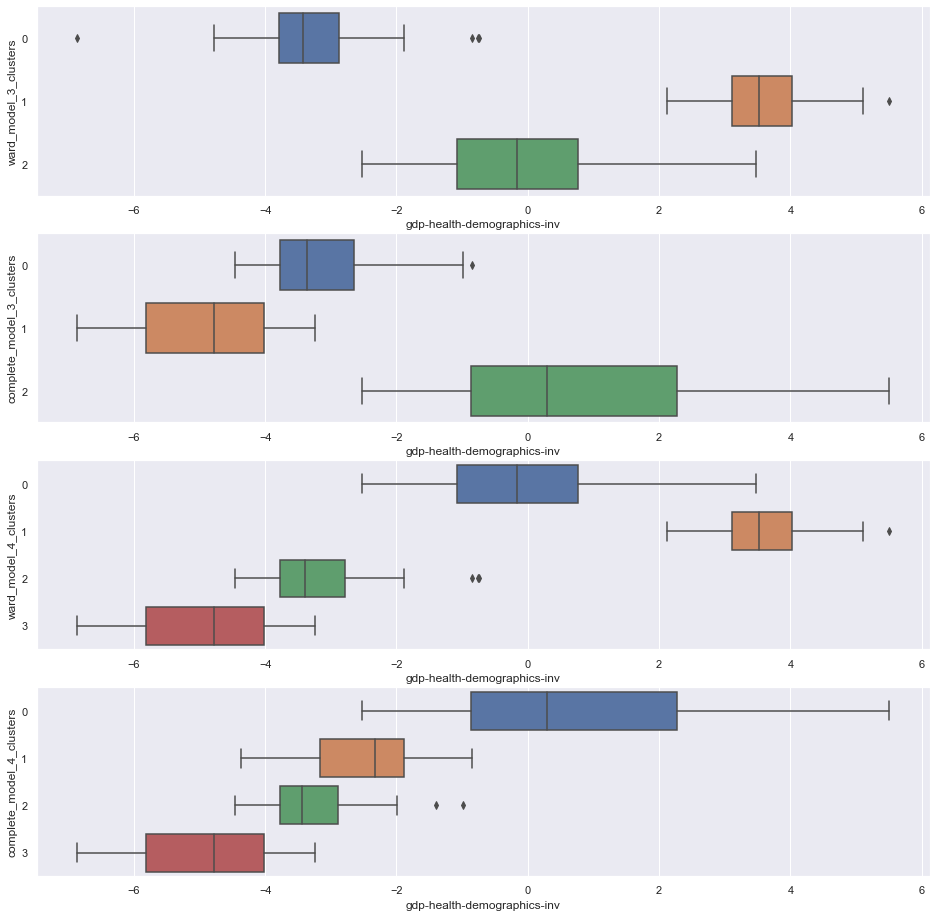

In [106]:
# Average Behaviour of each Cluster


# feature vs model
f, axes = plt.subplots(4,1, figsize=(16,16))
sb.boxplot(x = 'gdp-health-demographics-inv', y = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.boxplot(x = 'gdp-health-demographics-inv', y = 'complete_model_4_clusters', data = clustered_data, ax = axes[1])
sb.boxplot(x = 'gdp-health-demographics-inv', y = 'ward_model_4_clusters', data = clustered_data, ax = axes[2])
sb.boxplot(x = 'gdp-health-demographics-inv', y = 'complete_model_4_clusters', data = clustered_data, ax = axes[3])

